# Training SVC

## Distribution of Data

Need to make sure that the training data is normalized and has almost equal number of Car and Non-Car samples

Total Cars: 8795
Total Non-Cars: 9488
Total Data: 18283
Total Training: 14626
Total Test: 3656


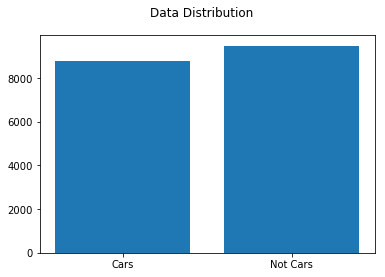

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.model_selection import train_test_split

cars = glob.glob('./vehicles/**/*.png', recursive=True)
cars.extend(glob.glob('./vehicles/**/*.jpeg', recursive=True))
notcars = glob.glob('./non-vehicles/**/*.png', recursive=True)
notcars.extend(glob.glob('./non-vehicles/**/*.jpeg', recursive=True))

#cars = glob.glob('./vehicles_smallset/**/*.jpeg', recursive=True)
#notcars = glob.glob('./non-vehicles_smallset/**/*.jpeg', recursive=True)

count = len(cars) + len(notcars)

print('Total Cars:', len(cars))
print('Total Non-Cars:', len(notcars))
print('Total Data:', count)
print('Total Training:', int(count * 0.8))
print('Total Test:', int(count * 0.2))

data = [len(cars), len(notcars)]
index = np.arange(2)
plt.bar(index, data)
plt.xticks(index, ('Cars', 'Not Cars'))
plt.suptitle('Data Distribution')
plt.show()

## Common Functions

## Color Space Exploration

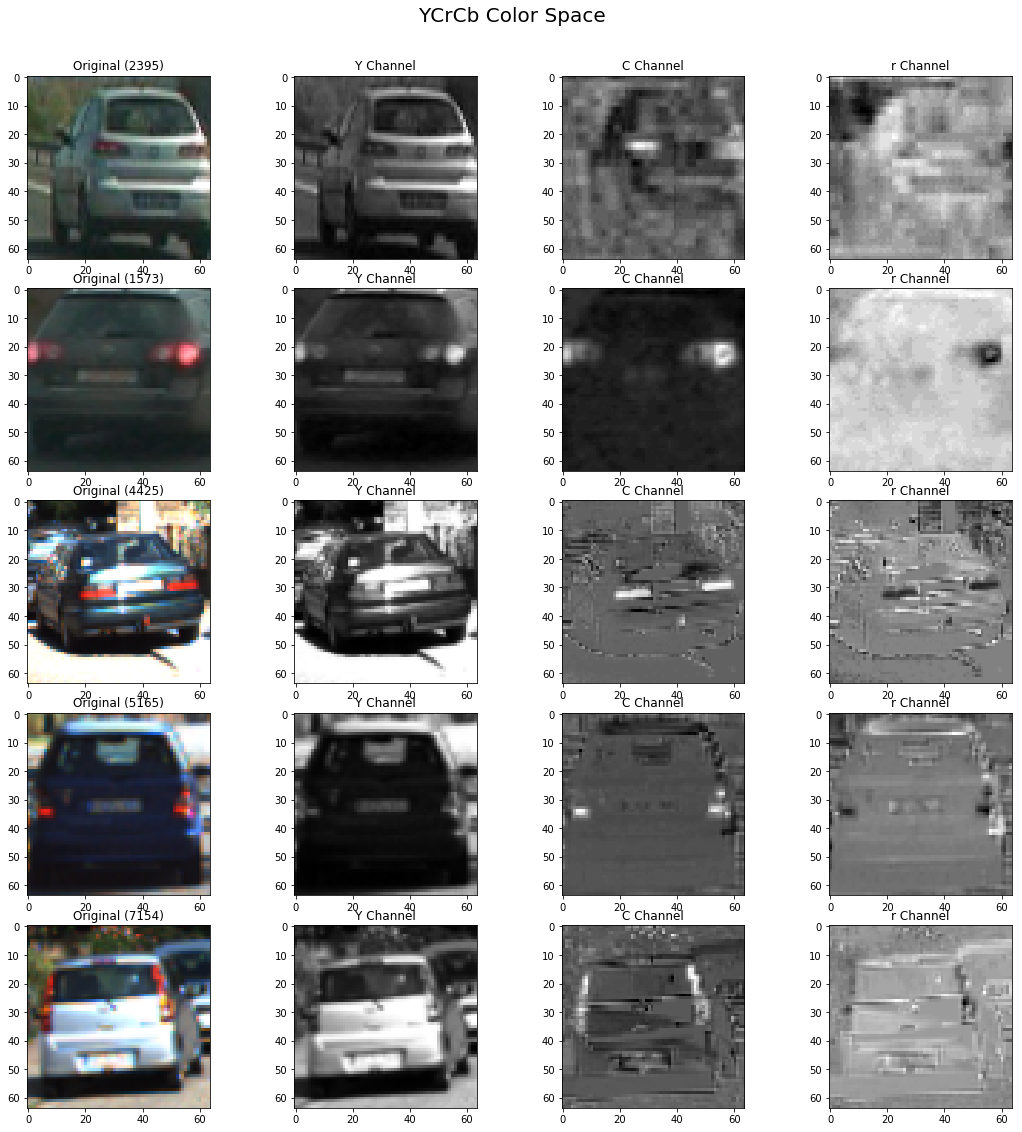

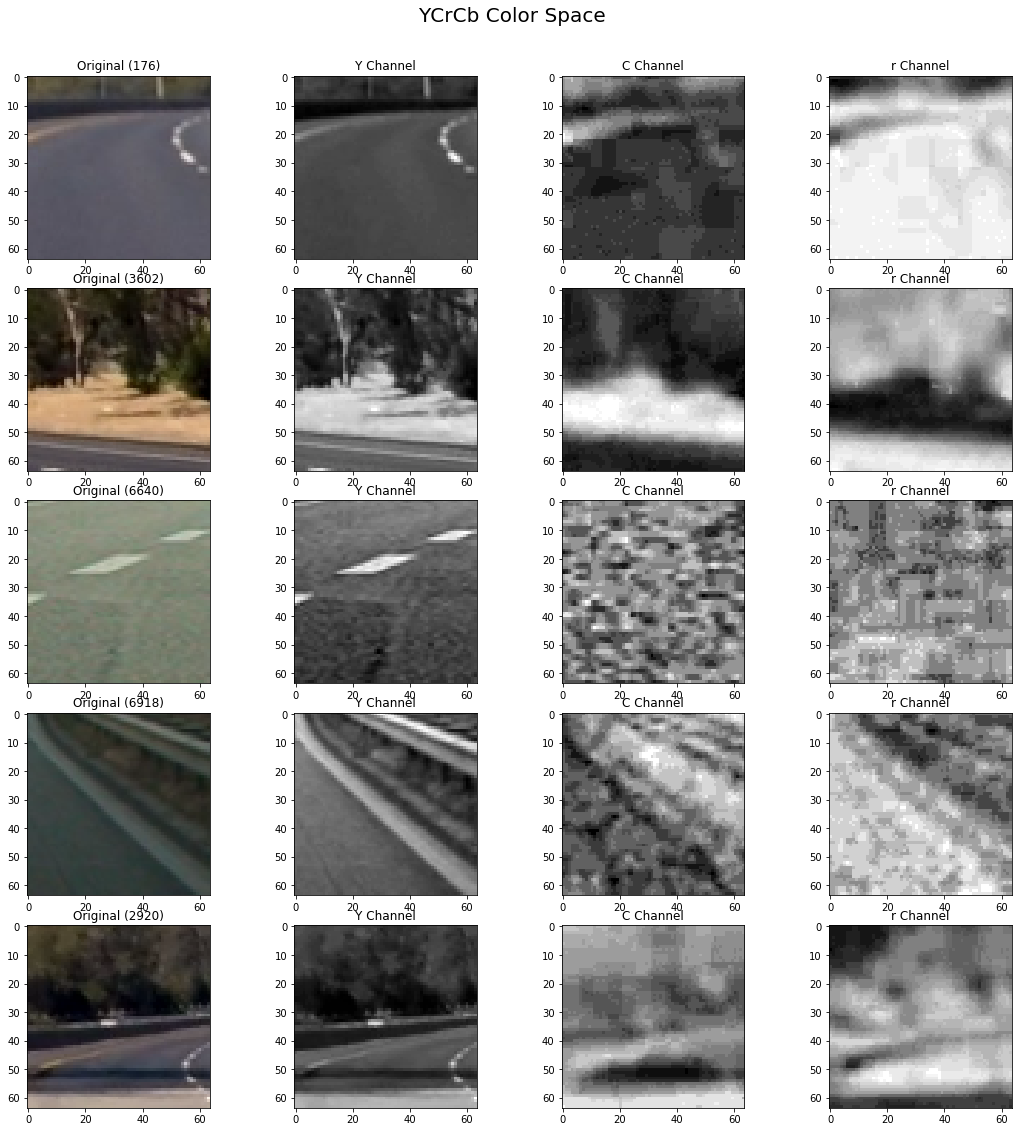

In [2]:
from lesson_functions import *

color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

def display_random(filenames, n_samples):
    f, ax = plt.subplots(n_samples, 4, figsize=(15,16))
    f.tight_layout()
    f.subplots_adjust(top=0.92)
    f.suptitle(color_space + " Color Space", fontsize=20)

    indices = np.random.choice(len(filenames), n_samples, replace=False)
    
    for i in range(n_samples):
        index = indices[i]
        img = load_image(filenames[index], color_space)
        rgb = load_image(filenames[index], 'RGB')

        ax[i,0].imshow(rgb)
        ax[i,0].set_title('Original ({})'.format(index))

        for j in range(3):
            ax[i,1 + j].imshow(img[:,:,j], cmap='gray')
            ax[i,1 + j].set_title(color_space[j] + ' Channel')

display_random(cars, 5)
display_random(notcars, 5)
plt.show()

## Hog of Channels

Using colorspace YCrCb
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)
(5, 5, 4, 4, 9)


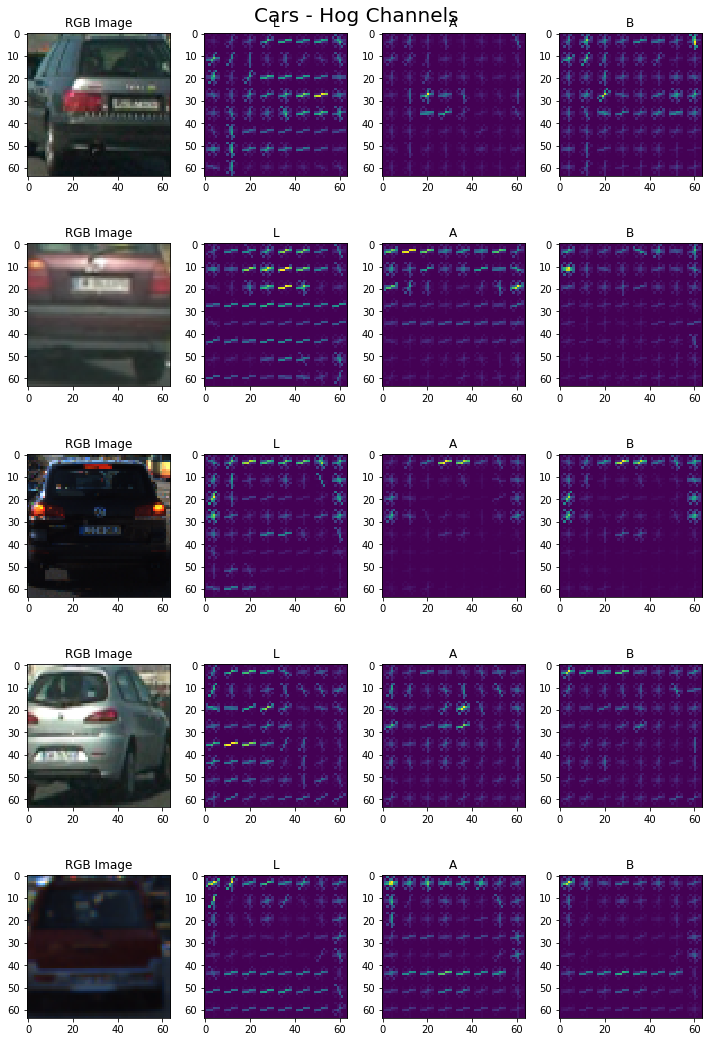

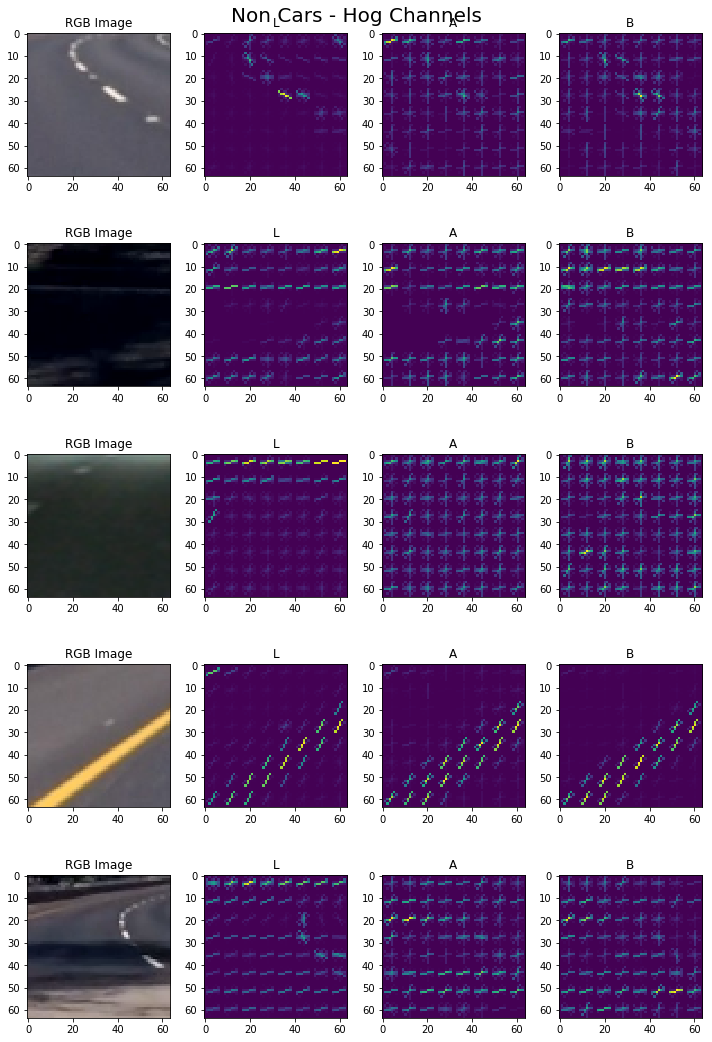

In [3]:
pix_per_cell = 8
cell_per_block = 4
orient = 9

n_samples = 5

def show_hog(title, filenames):
    indices = np.random.choice(len(filenames), n_samples)
    
    f, ax = plt.subplots(n_samples, 4, figsize=(10,15))
    f.tight_layout()
    f.suptitle(title, fontsize=20)

    for i in range(n_samples):
        index = indices[i]

        luv = load_image(filenames[index], color_space)
        L = luv[:,:,0]
        U = luv[:,:,1]
        V = luv[:,:,2]
        
        features, hog_img_l = get_hog_features(L, orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, vis=True, feature_vec = False)
        print(features.shape)
        _, hog_img_u = get_hog_features(U, orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, vis=True)
        _, hog_img_v = get_hog_features(V, orient=orient, pix_per_cell=pix_per_cell, 
                                        cell_per_block=cell_per_block, vis=True)
        
        img = load_image(filenames[index], 'RGB')
        ax[i,0].imshow(img)
        ax[i,0].set_title('RGB Image')
        ax[i,1].imshow(hog_img_l)
        ax[i,1].set_title('L')
        ax[i,2].imshow(hog_img_u)
        ax[i,2].set_title('A')
        ax[i,3].imshow(hog_img_v)
        ax[i,3].set_title('B')
    
    f.tight_layout()
    return indices

print('Using colorspace', color_space)
car_indices = show_hog('Cars - Hog Channels', cars)
notcar_indices = show_hog('Non Cars - Hog Channels', notcars)

plt.show()

## Hog Laplacian

cv2.LapLacian is used and then Hof the laplacian is used as a feature as well

In [4]:
# orient = 12
# pix_per_cell = 12
# cell_per_block = 2

# n_samples = 5

# def show_laplacian(title, filenames, indices):
#     f, ax = plt.subplots(n_samples, 3, figsize=(10,21))
#     f.suptitle(title, fontsize=20)

#     for i in range(n_samples):
#         index = indices[i]

#         img_space = load_image(filenames[index], 'GRAY')
#         img_space = cv2.GaussianBlur(img_space, (3,3), 0)
#         laplacian = cv2.Laplacian(img_space, cv2.CV_64F)
        

#         lh = []
#         _, lh_channel = hog(laplacian, orientations=orient, 
#                             pixels_per_cell=(pix_per_cell, pix_per_cell),
#                             cells_per_block=(cell_per_block, cell_per_block), 
#                             transform_sqrt=False, 
#                             visualise=True, 
#                             feature_vector=False,
#                             block_norm='L2-Hys')
#         lh.append(lh_channel)
        
#         img = load_image(filenames[index], 'RGB')
#         ax[i,0].imshow(img)
#         ax[i,1].imshow(laplacian, cmap='gray')
#         ax[i,2].imshow(lh[0])
    
#     f.tight_layout()

# print('Using colorspace', color_space)
# show_laplacian('Cars - Lapacian Hog', cars, car_indices)
# show_laplacian('Non Cars - Lapacian Hog', notcars, notcar_indices)

# plt.show()

## Spatial Features
Shows effects of spatial size, which is just a resize of image and then raveling it

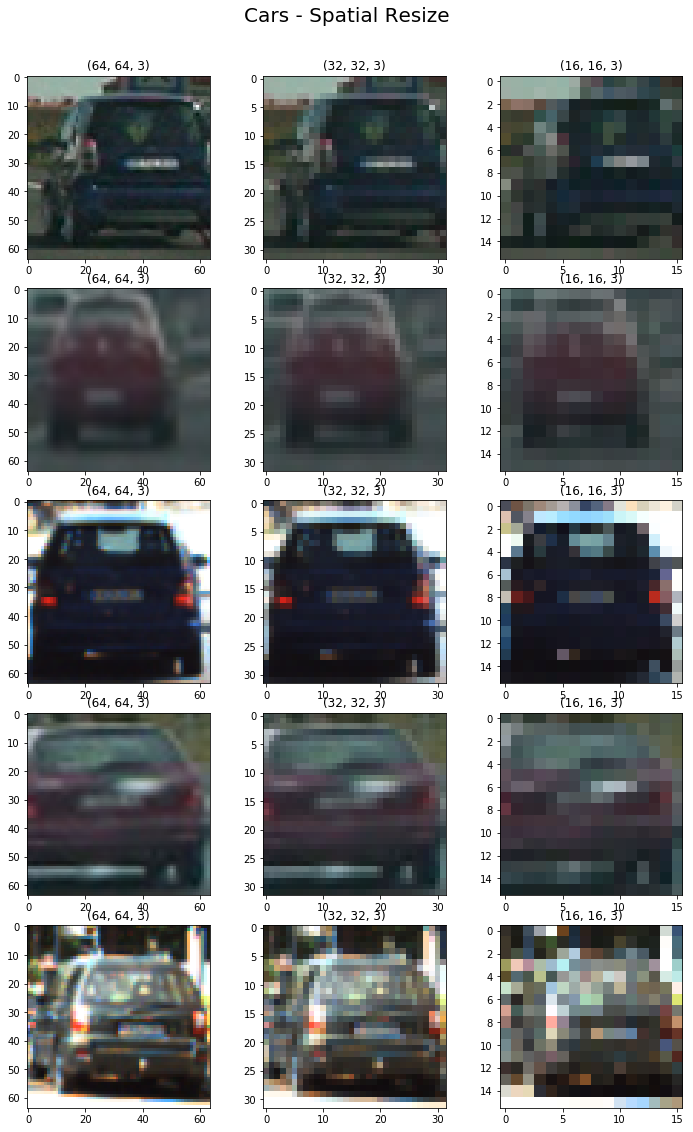

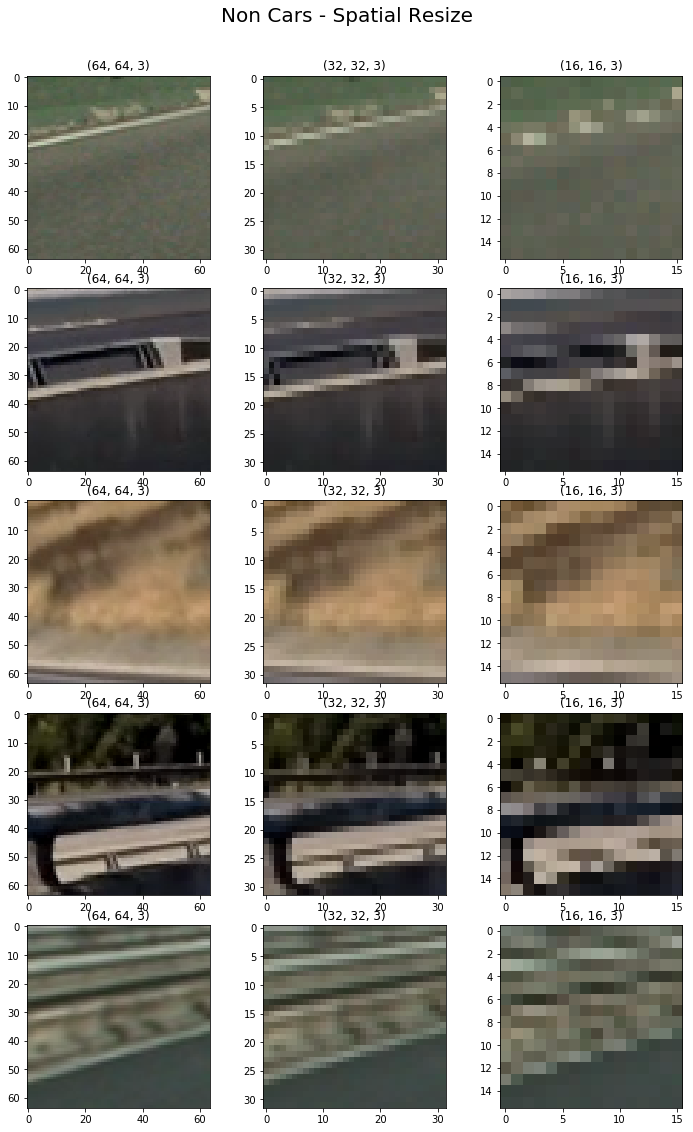

In [5]:
n_samples = 5

def show_resize(title, filenames):
    indices = np.random.choice(len(filenames), n_samples)
    
    f, ax = plt.subplots(n_samples, 3, figsize=(10,16))
    f.tight_layout()
    f.suptitle(title, fontsize=20)
    f.subplots_adjust(top=0.92)
    
    for i in range(n_samples):
        index = indices[i]

        img = []
        img.append(load_image(filenames[index], 'RGB'))
        img.append(cv2.resize(img[0], (32,32)))
        img.append(cv2.resize(img[0], (16,16)))
        
        for j in range(len(img)):
            ax[i,j].imshow(img[j])
            ax[i,j].set_title(img[j].shape)

show_resize('Cars - Spatial Resize', cars)
show_resize('Non Cars - Spatial Resize', notcars)
plt.show()

## Color Histogram

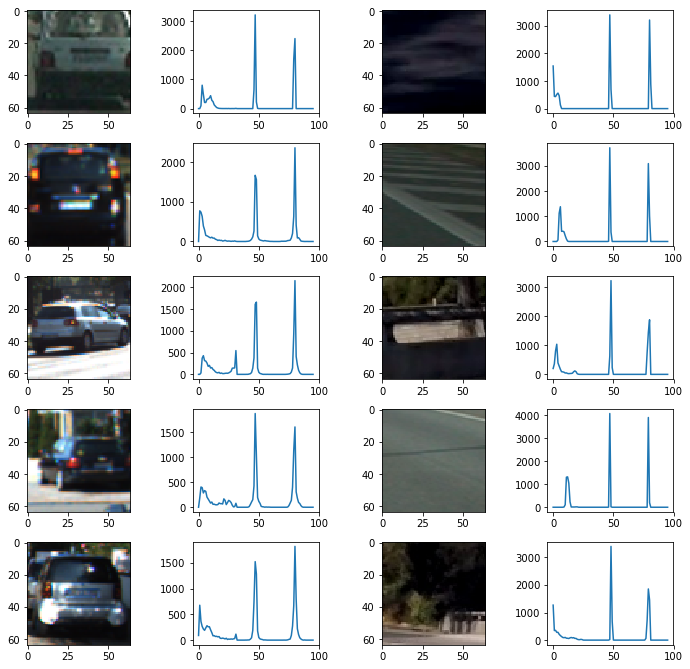

In [6]:
n_samples = 5

indices = np.random.choice(len(cars), n_samples)

f, ax = plt.subplots(n_samples, 4, figsize=(10,10))
f.tight_layout()
f.subplots_adjust(top=0.92)

for i in range(n_samples):
    index = indices[i]
    
    car_img = load_image(cars[index], color_space)
    notcar_img = load_image(notcars[index], color_space)
    car_features = color_hist(car_img)
    notcar_features = color_hist(notcar_img)

    #  for displaying show RGB on screen
    car_img = load_image(cars[index], "RGB")
    notcar_img = load_image(notcars[index], "RGB")

    ax[i,0].imshow(car_img)
    ax[i,1].plot(car_features)
    ax[i,2].imshow(notcar_img)
    ax[i,3].plot(notcar_features)

plt.show()

## Gradient of Image

In [7]:
# def show_grad(filenames, index):
#     #gray = load_image(filenames[index], 'GRAY')
#     img = load_image(filenames[index], 'LAB')
#     gray = img[:,:,0]
#     img = cv2.GaussianBlur(gray, (3,3), 0)
    
#     laplacian = cv2.Laplacian(img, cv2.CV_64F)
#     sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
#     sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
#     f, ax = plt.subplots(1, 4, figsize=(10,5))
#     ax[0].imshow(img, cmap='gray')
#     ax[1].imshow(laplacian, cmap='gray')
#     ax[2].imshow(sobelx, cmap='gray')
#     ax[3].imshow(sobely, cmap='gray')

# def get_laplacian_hog(channel, visualise = False, ravel = False):
#     laplacian = get_laplacian(channel)
#     hog_laplacian = hog(laplacian, orientations=9, 
#                             pixels_per_cell=(8, 8),
#                             cells_per_block=(2, 2), 
#                             transform_sqrt=False, 
#                             visualise=visualise, 
#                             feature_vector=False,
#                             block_norm='L2-Hys')
    
#     if ravel == True:
#         return np.ravel(hog_laplacian)
    
#     return hog_laplacian
    
# def show_laplac(title, filenames):
#     indices = np.random.choice(len(filenames), n_samples)
    
#     f, ax = plt.subplots(n_samples, 3, figsize=(20,16))
#     f.tight_layout()
#     f.suptitle(title, fontsize=20)
#     f.subplots_adjust(top=0.92)

#     orient = 9  # HOG orientations
#     pix_per_cell = 8 # HOG pixels per cell
#     cell_per_block = 2 # HOG cells per block

#     for i in range(n_samples):
#         index = indices[i]
        
#         img = load_image(filenames[index], 'LAB')
#         L = img[:,:,0]

#         _, hog_img_l = get_laplacian_hog(L, visualise=True)

#         laplacian = get_laplacian(L)

#         ax[i,0].imshow(img, cmap='gray')
#         ax[i,0].set_title('L Channel')
#         ax[i,1].imshow(laplacian, cmap='gray')
#         ax[i,1].set_title('Laplacan ' + str(laplacian.shape))
#         ax[i,2].imshow(hog_img_l, cmap='gray')
#         ax[i,2].set_title('Hog ' + str(hog_img_l.shape))

        
# show_laplac('Cars Laplacian', cars)
# show_laplac('Non Cars Laplacian', notcars)

# plt.show()

## Features Chosen

Color Space: YCrCb

Hog of 0th Channel Only

[Spatial Features 32 x 32][Color Histogram][Hog of All Channels]

In [8]:
orient = 11
pix_per_cell = 16
cell_per_block = 2
spatial_feat = False
hist_feat = True
hog_feat = True
color_space='YCrCb'
hog_channel = [0,1,2]
spatial_size = (32,32)
hist_bins = 32

### Size of each feature

In [9]:
img = load_image(cars[0], color_space)
spatial_features = bin_spatial(img, spatial_size) if spatial_feat else []
hist_features = color_hist(img, nbins=hist_bins) if hist_feat else []

hog_features = []
for channel in hog_channel:
    hog_features.append(get_hog_features(img[:,:,channel], 
                        orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True))

hog_features = np.ravel(hog_features)

print('Spatial Features:', len(spatial_features))
print('Color Histogram features:', len(hist_features))
print('Hog Features:', len(hog_features))
print('Total:', len(spatial_features) + len(hist_features) + len(hog_features))

Spatial Features: 0
Color Histogram features: 96
Hog Features: 1188
Total: 1284


### Feature Extraction & Data Split

In [10]:
from skimage.feature import hog
import pickle
import os
from lesson_functions import *

%reload_ext autoreload
%autoreload 2

print('Extracting car features')
car_features = extract_features(cars, color_space=color_space, orient=orient, pix_per_cell=pix_per_cell,
                               cell_per_block=cell_per_block, hog_channel=hog_channel,
                               spatial_feat = spatial_feat,
                               spatial_size = spatial_size,
                               hist_feat = hist_feat,
                               hog_feat = hog_feat)
                               
print('Extracting notcar features')
notcar_features = extract_features(notcars, color_space=color_space, orient=orient, pix_per_cell=pix_per_cell,
                               cell_per_block=cell_per_block, hog_channel=hog_channel,
                               spatial_feat = spatial_feat,
                               spatial_size = spatial_size,
                               hist_feat = hist_feat,
                               hog_feat = hog_feat)

print('Scaling combined features')
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# X_scaler = StandardScaler().fit(X)
# scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

print('Splitting into training and testing')
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train_scaler = StandardScaler().fit(X_train)
X_train = X_train_scaler.transform(X_train)
X_test = X_train_scaler.transform(X_test)

print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

Extracting car features
Extracting notcar features
Scaling combined features
Splitting into training and testing
X_train size: (14626, 1284)
y_train size: (14626,)
X_test size: (3657, 1284)
y_test size: (3657,)


## SVM Training

In [11]:
svc = LinearSVC()

t = time.time()
print('Starting training...')

svc.fit(X_train, y_train)

t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

print('Train Accuracy of SVC = ', round(svc.score(X_train, y_train), 4))
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

t = time.time()
print('Time for accuracy testing', t - t2)


Starting training...
2.46 Seconds to train SVC...
Train Accuracy of SVC =  0.9997
Test Accuracy of SVC =  0.9855
Time for accuracy testing 0.04049944877624512


In [12]:
with open('svm.p', 'wb') as f:
    data = {'svm':svc, 
            'scaler': X_train_scaler,
            'orient' : orient,
            'pix_per_cell' : pix_per_cell,
            'cell_per_block' : cell_per_block,
            'spatial_feat' : spatial_feat,
            'hist_feat' : hist_feat,
            'hog_channel' : hog_channel,
            'hog_feat' : hog_feat,
            'color_space': color_space,
            'spatial_size' : spatial_size
           }
    pickle.dump(data, f)
    
print('Classifier saved to svm.p')
print(data)

Classifier saved to svm.p
{'svm': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0), 'spatial_feat': False, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'orient': 11, 'hog_feat': True, 'spatial_size': (32, 32), 'hog_channel': [0, 1, 2], 'pix_per_cell': 16, 'hist_feat': True, 'cell_per_block': 2, 'color_space': 'YCrCb'}


In [13]:
svc = None

with open('svm.p', 'rb') as f:
    svc = data['svm']
    X_train_scaler = data['scaler']
    orient = data['orient'] 
    pix_per_cell = data['pix_per_cell']
    cell_per_block = data['cell_per_block']
    spatial_feat = data['spatial_feat']
    hist_feat = data['hist_feat']
    hog_feat = data['hog_feat']
    hog_channel = data['hog_channel']
    color_space = data['color_space']
    spatial_size = data['spatial_size']
    
print('Classifier loaded, testing on training')
print('Train Accuracy of SVC = ', round(svc.score(X_train, y_train), 4))
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# check on all non-cars from video

filenames = glob.glob('./non-vehicles/from_video/*.jpeg')
video_test = extract_features(filenames, color_space=color_space, 
                              orient=orient, 
                              pix_per_cell=pix_per_cell,
                              cell_per_block=cell_per_block, 
                              hog_channel=hog_channel,
                              spatial_size = spatial_size,
                              spatial_feat = spatial_feat,
                              hist_feat = hist_feat,
                              hog_feat = hog_feat)

video_test_feat = np.array(video_test)
print('Video Test Feature Shape:', video_test_feat.shape)
video_test_scaled = X_train_scaler.transform(video_test_feat)
y = np.zeros(video_test_feat.shape[0])

print('Test Accuracy on non-car video frames = ', round(svc.score(video_test_scaled, y), 4))


Classifier loaded, testing on training
Train Accuracy of SVC =  0.9997
Test Accuracy of SVC =  0.9855
Video Test Feature Shape: (520, 1284)
Test Accuracy on non-car video frames =  1.0


YCrCb


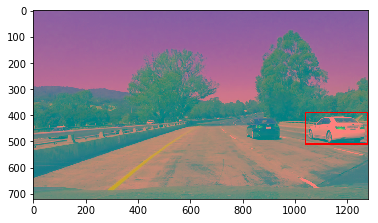

[ 1.]


In [14]:
from lesson_functions import *

%reload_ext autoreload
%autoreload 2

print(color_space)
img = load_image('./test_images/test1.jpg', color_space)

box = [(1040,390),(1280,510)]
cv2.rectangle(img, box[0], box[1], (255,0,0), 3)
plt.imshow(img)
plt.show()

box_pixels = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]

#plt.imshow(box_pixels)
#plt.show()

small_img = cv2.resize(box_pixels, (64,64))
features = extract_feature_image(small_img, orient=orient, pix_per_cell=pix_per_cell,
                               cell_per_block=cell_per_block, hog_channel=hog_channel,
                               spatial_feat = spatial_feat,
                               hist_feat = hist_feat,
                               spatial_size=spatial_size,
                               hog_feat = hog_feat)

features = np.ravel(features)
scaled_img = X_train_scaler.transform([features])

print(svc.predict(scaled_img))

## Lower Image for Car Detection

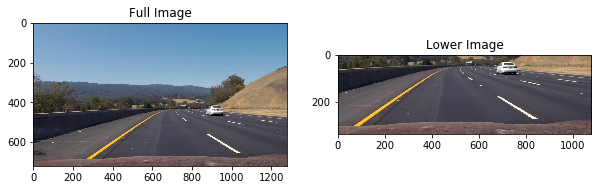

In [15]:
import matplotlib.pyplot as plt
from lesson_functions import *

%reload_ext autoreload
%autoreload 2

img = load_image('./test_images/test3.jpg', "RGB")
lower = img[380:,200:]

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.imshow(img)
ax1.set_title('Full Image')
ax2.imshow(lower)
ax2.set_title('Lower Image')
plt.show()
